# Problem Set 9

Dennis Cruz, dec2174

Collaborators: Edward Sanchez, es2903

### Problem 1

In [1]:
# Advection Equation code:
# Finite-difference implementation of FTCS (Forward Time Centered Space)
# for linear advection
# fdavdvect.py  from M. Zingale (2013-03-12)

### Part 1:
Linear Stability requires that 
abs(A^n+1 / A^n) <= 1

Applying the Von Neumann stability analysis:

(ai^(n+1) - ai^n)/dt + ((ai^n - a(i-1)^n)/dx) = 0 with ai^n = A^n*e^(I*i*theta)

then solving for the amplification factor:

A^(n+1) / A^n = 1 - C + C*cos(theta) - I*sin(theta)

normalizing:

abs(A^n+1 / A^n) = 1 - 2*C*(1-C)*(1-cos(theta)

1 - cos(theta) >= 0 so the stability condition is met when 2*C*(1-C) >= 0 

since C = a*(dt/dx)

then:

0 <= a*(dt/dx) <= 1

therefore:

dt <= dt/a

In [3]:
# Part 2:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class FDGrid(object):
    
    def __init__(self, nx, ng, xmin=0.0, xmax=1.0):
        self.xmin = xmin
        self.xmax = xmax
        self.ng   = ng
        self.nx   = nx

        # python is zero-based. Make easy intergers to know where the real
        # data lives
        self.ilo = ng
        self.ihi = ng + nx - 1

        # physical coords:
        self.dx = (xmax - xmin) / (nx - 1)
        self.x  = xmin + (np.arange(nx + 2*ng) - ng)*self.dx

        # storage for the solution
        self.a = np.zeros((nx + 2*ng), dtype = np.float64)
    
    def scratch_array(self):
        # return a scratch array dimensioned for our grid
        return np.zeros((self.nx + 2*self.ng), dtype = np.float64)
    
    def fill_BCs(self):
        # fill a single ghostcell wiht periodic boundary conditions
        self.a[self.ilo - 1] = self.a[self.ihi - 1]
        self.a[self.ihi + 1] = self.a[self.ilo + 1]
    

In [4]:
# create the grid:
nx = 65
ng = 1
g = FDGrid(nx, ng)

# define the CFL and speed:
C = 0.9
u = 1.0

# time info
dt = C*g.dx / u
t = 0.0
tmax = 1.0*(g.xmax - g.xmin) / u

# initialize the data - tophat
g.a[np.logical_and(g.x >= 0.333, g.x <= 0.666)] = 1.0
ainit = g.a.copy()



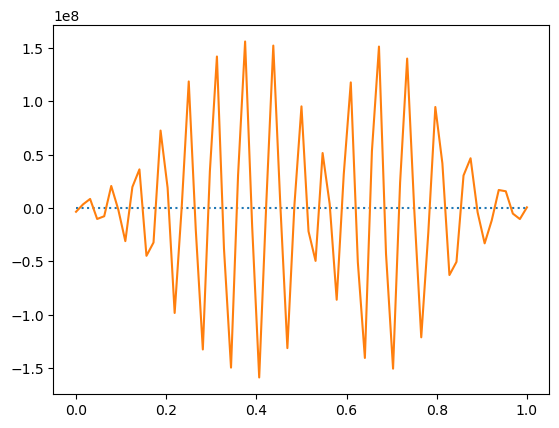

In [5]:
# evolution loop
anew = g.scratch_array()

while t < tmax:
    
    #fill the boundary conditions
    g.fill_BCs
    
    #loop over zones: note since we are periodic and both endpoints 
    # are on the computational domain boundary, we don't have to 
    # update both g.ilo and g. ihi - we could set them equal instead.
    # But this is more general
    
    for i in range(g.ilo, g.ihi + 1):
        
        #FTCS
        anew[i] = g.a[i] - 0.5*C*(g.a[i+1] - g.a[i-1])
        
        # upwind
        # anew[i] = g.a[i] - C*(g.a[i] - g.a[i-1])
        
    # store the updated solution
    g.a[:] = anew[:]
    
    t+=dt
    
plt.plot(g.x[g.ilo:g.ihi+1], ainit[g.ilo:g.ihi+1], ls=":")
plt.plot(g.x[g.ilo:g.ihi+1], g.a[g.ilo:g.ihi+1])
plt.savefig("fdadvect.png")

In [ ]:
# Other resources used:
# 